In [1]:
# notebook to load the raw govt (CPCB/DPCC/IMD) data in the Excel sheet format and save them as csvs with latitude 
# and longitude fields

%matplotlib inline

from glob import glob
from openpyxl import Workbook
from openpyxl import load_workbook
import json
from datetime import datetime
from datetime import timedelta
import time
import os, sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load all the Excel sheets from the source folder on Dropbox

# sheets = sorted(glob('data/govdata/*.xlsx'), key=lambda name: int(name.split('/data')[1].replace('.xlsx','')))
sheets = sorted(glob('/home/shivar/Dropbox/Delhi Pollution/07_Data_Secondary/CPCB_Oct2018/Raw/*.xlsx'))
for sh in sheets:
    print(sh)

/home/shivar/Dropbox/Delhi Pollution/07_Data_Secondary/CPCB_Oct2018/Raw/AnandVihar_DPCC.xlsx
/home/shivar/Dropbox/Delhi Pollution/07_Data_Secondary/CPCB_Oct2018/Raw/AshokVihar_DPCC.xlsx
/home/shivar/Dropbox/Delhi Pollution/07_Data_Secondary/CPCB_Oct2018/Raw/AyaNagar_IMD.xlsx
/home/shivar/Dropbox/Delhi Pollution/07_Data_Secondary/CPCB_Oct2018/Raw/BurariCrossing_IMD.xlsx
/home/shivar/Dropbox/Delhi Pollution/07_Data_Secondary/CPCB_Oct2018/Raw/CRRIMathuraRoad_IMD.xlsx
/home/shivar/Dropbox/Delhi Pollution/07_Data_Secondary/CPCB_Oct2018/Raw/DKSSR_DPCC.xlsx
/home/shivar/Dropbox/Delhi Pollution/07_Data_Secondary/CPCB_Oct2018/Raw/DTU_CPCB.xlsx
/home/shivar/Dropbox/Delhi Pollution/07_Data_Secondary/CPCB_Oct2018/Raw/DwarkaSector8_DPCC.xlsx
/home/shivar/Dropbox/Delhi Pollution/07_Data_Secondary/CPCB_Oct2018/Raw/EastArjunNagar_CPCB.xlsx
/home/shivar/Dropbox/Delhi Pollution/07_Data_Secondary/CPCB_Oct2018/Raw/IGIAirport_IMD.xlsx
/home/shivar/Dropbox/Delhi Pollution/07_Data_Secondary/CPCB_Oct2018/Raw/

In [3]:
sample = load_workbook(sheets[0])

In [4]:
sample.sheetnames

['Sheet1']

In [5]:
# define function to read just Excel file as an example, to
# understand the format, number of entries and so on
    
def myconv(strval):
    if strval=='None':
        return np.nan
    else:
        return float(strval)

# nrows = 24 * 60 // 15
# for rr in range(nrows):
data = []
rr = 0
while True:
    date = sample['Sheet1'].cell(14 + rr, 1).value
    if date is None: break
    value1 = myconv(sample['Sheet1'].cell(14 + rr, 3).value)
    value2 = myconv(sample['Sheet1'].cell(14 + rr, 4).value)
    
    # to re-format the date and time in the same format as the Kaiterra dts
    dobj = datetime.strptime(date, '%d-%m-%Y %H:%M')
    data.append([dobj.strftime('%Y-%m-%d %H:%M:%S') + '+05:30', value1, value2])
    rr += 1

In [6]:
print(len(data), data[0][0], data[-1][0])

23520 2018-03-01 00:00:00+05:30 2018-10-31 23:45:00+05:30


In [7]:
data

[['2018-03-01 00:00:00+05:30', 163.0, 525.0],
 ['2018-03-01 00:15:00+05:30', 163.0, 525.0],
 ['2018-03-01 00:30:00+05:30', 163.0, 525.0],
 ['2018-03-01 00:45:00+05:30', 163.0, 525.0],
 ['2018-03-01 01:00:00+05:30', 172.0, 703.0],
 ['2018-03-01 01:15:00+05:30', 172.0, 703.0],
 ['2018-03-01 01:30:00+05:30', 172.0, 703.0],
 ['2018-03-01 01:45:00+05:30', 172.0, 703.0],
 ['2018-03-01 02:00:00+05:30', 154.0, 746.0],
 ['2018-03-01 02:15:00+05:30', 154.0, 746.0],
 ['2018-03-01 02:30:00+05:30', 154.0, 746.0],
 ['2018-03-01 02:45:00+05:30', 154.0, 746.0],
 ['2018-03-01 03:00:00+05:30', 188.0, 685.0],
 ['2018-03-01 03:15:00+05:30', 188.0, 685.0],
 ['2018-03-01 03:30:00+05:30', 188.0, 685.0],
 ['2018-03-01 03:45:00+05:30', 188.0, 685.0],
 ['2018-03-01 04:00:00+05:30', 153.0, 516.0],
 ['2018-03-01 04:15:00+05:30', 153.0, 516.0],
 ['2018-03-01 04:30:00+05:30', 153.0, 516.0],
 ['2018-03-01 04:45:00+05:30', 153.0, 516.0],
 ['2018-03-01 05:00:00+05:30', 195.0, 707.0],
 ['2018-03-01 05:15:00+05:30', 195

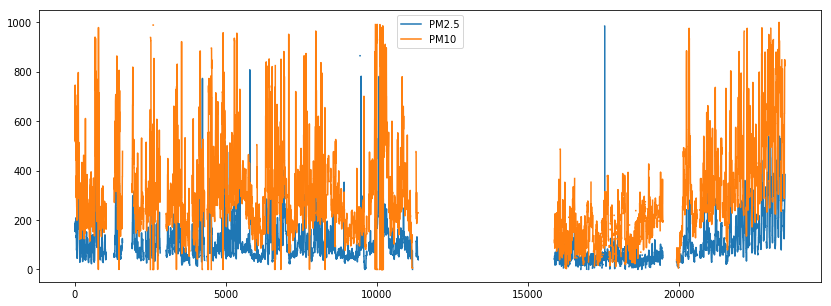

In [8]:
# sample plot of the data as an example illustration

plt.figure(figsize=(14, 5))
plt.plot(np.asarray([ent[1] for ent in data]), label='PM2.5')
plt.plot(np.asarray([ent[2] for ent in data]), label='PM10')
plt.legend()
plt.show()
plt.close()

In [9]:
import json

# reading in the metadata to get the latitudes and longitudes
locsdict = dict()

with open('data/gov_metadata.json')as fl:
    stations = json.load(fl)

for station in stations['map']['station_list']:
    nm = station['station_name']
    locsdict[nm] = (float(station['latitude']), float(station['longitude']))

In [10]:
print(len(locsdict))
locsdict

134


{'Lodhi Road, New Delhi - IMD': (28.5918245, 77.2273074),
 'Sector - 125, Noida, UP - UPPCB': (28.5447608, 77.3231257),
 'CRRI Mathura Road, New Delhi - IMD': (28.5512005, 77.2735737),
 'Burari Crossing, New Delhi - IMD': (28.7256504, 77.2011573),
 'ITO, New Delhi - CPCB': (28.6316945, 77.2494387),
 'Pusa, New Delhi - IMD': (28.639645, 77.146263),
 'DTU, New Delhi - CPCB': (28.7500499, 77.1112615),
 'North Campus, DU, New Delhi - IMD': (28.6573814, 77.1585447),
 'Shadipur, New Delhi - CPCB': (28.6514781, 77.1473105),
 'Aya Nagar, New Delhi - IMD': (28.4706914, 77.1099364),
 'Vasundhara, Ghaziabad, UP - UPPCB': (28.6603346, 77.3572563),
 'NSIT Dwarka, New Delhi - CPCB': (28.60909, 77.0325413),
 'Sector - 62, Noida, UP - IMD': (28.6245479, 77.3577104),
 'IHBAS, Dilshad Garden,New Delhi - CPCB': (28.6811736, 77.3025234),
 'BWSSB Kadabesanahalli, Bengaluru - CPCB': (12.9352049, 77.6814488),
 'Vikas Sadan, Gurgaon, Haryana - HSPCB': (28.4501238, 77.0263051),
 'Police Commissionerate, Jaipur

In [11]:
# correct errors (see notes.txt in the same folder as this notebook)
# (1) remove DU north campus
# (2) swap RK Puram and Punjabi Bagh locations
locsdict.__delitem__('North Campus, DU, New Delhi - IMD')
locsdict['Punjabi Bagh, Delhi - DPCC'] = (28.674045, 77.131023)
locsdict['R K Puram, New Delhi - DPCC'] = (28.563262, 77.186937)

In [12]:
# now read data for all the monitors and export into dataframe format
import pandas as pd

def todf(sheet):

    data = []
    rr = 0
    
    locname = sheet.cell(5, 2).value
    latitude, longitude = locsdict[locname]
    
    while True:
        date = sheet.cell(14 + rr, 1).value
        if date is None: 
            break
        
        value1 = myconv(sheet.cell(14 + rr, 3).value) # pm2.5
        value2 = myconv(sheet.cell(14 + rr, 4).value) # pm10
        
        # to re-format the date and time in the same format as the Kaiterra dts
        dobj = datetime.strptime(date, '%d-%m-%Y %H:%M')
        data.append([dobj.strftime('%Y-%m-%d %H:%M:%S') + '+05:30', value1, value2])
        rr += 1
    
    dtindex = [ent[0] for ent in data]
    valarr = np.asarray([(ent[1], ent[2], latitude, longitude) for ent in data])
    df = pd.DataFrame(valarr, index=dtindex, columns=['pm25', 'pm10', 'latitude', 'longitude'])
    df['location'] = locname
    df.index.name = 'timestamp_round'
    
    return df

In [13]:
df = todf(load_workbook(sheets[0])['Sheet1'])

In [14]:
df

,pm25,pm10,latitude,longitude,location
timestamp_round,,,,,
2018-03-01 00:00:00+05:30,163.0,525.0,28.646835,77.316032,"Anand Vihar, Delhi - DPCC"
2018-03-01 00:15:00+05:30,163.0,525.0,28.646835,77.316032,"Anand Vihar, Delhi - DPCC"
2018-03-01 00:30:00+05:30,163.0,525.0,28.646835,77.316032,"Anand Vihar, Delhi - DPCC"
2018-03-01 00:45:00+05:30,163.0,525.0,28.646835,77.316032,"Anand Vihar, Delhi - DPCC"
2018-03-01 01:00:00+05:30,172.0,703.0,28.646835,77.316032,"Anand Vihar, Delhi - DPCC"
2018-03-01 01:15:00+05:30,172.0,703.0,28.646835,77.316032,"Anand Vihar, Delhi - DPCC"
2018-03-01 01:30:00+05:30,172.0,703.0,28.646835,77.316032,"Anand Vihar, Delhi - DPCC"
2018-03-01 01:45:00+05:30,172.0,703.0,28.646835,77.316032,"Anand Vihar, Delhi - DPCC"
2018-03-01 02:00:00+05:30,154.0,746.0,28.646835,77.316032,"Anand Vihar, Delhi - DPCC"


In [15]:
# saving individual dataframes as individual csvs, and also saving a combined BIG csv

# also save the locations
locs_list = []

dfs_list = []
for fii, fpath in enumerate(sheets):
    print('{}/{}'.format(fii + 1, len(sheets)))
    if fpath.endswith('NorthCampusDU_IMD.xlsx'):
        continue
    sheet = load_workbook(fpath)
    df = todf(sheet['Sheet1'])
    savedir, savename = os.path.split(fpath)
    monitorid = savename[:-5]
    df['monitor_id'] = monitorid
    df.reset_index(inplace=True)
    df.set_index(['monitor_id', 'timestamp_round'], inplace=True)
    locs_list.append((monitorid, df.latitude[0], df.longitude[0], df.location[0]))
    df.drop(axis=1, labels=['latitude', 'longitude', 'location'], inplace=True)
    dfs_list.append(df)
    savename = 'govdata_15min_' + monitorid + '.csv'
    df.to_csv(os.path.join(savedir, savename))

pd.concat(dfs_list).to_csv(os.path.join(savedir, 'govdata_15min_panel.csv'))

1/34
2/34
3/34
4/34
5/34
6/34
7/34
8/34
9/34
10/34
11/34
12/34
13/34
14/34
15/34
16/34
17/34
18/34
19/34
20/34
21/34
22/34
23/34
24/34
25/34
26/34
27/34
28/34
29/34
30/34
31/34
32/34
33/34
34/34


In [16]:
savedir

'/home/shivar/Dropbox/Delhi Pollution/07_Data_Secondary/CPCB_Oct2018/Raw'

In [20]:
locs_list

[('AnandVihar_DPCC', 28.646835, 77.316032, 'Anand Vihar, Delhi - DPCC'),
 ('AshokVihar_DPCC', 28.695381, 77.181665, 'Ashok Vihar, Delhi - DPCC'),
 ('AyaNagar_IMD', 28.4706914, 77.1099364, 'Aya Nagar, New Delhi - IMD'),
 ('BurariCrossing_IMD',
  28.7256504,
  77.2011573,
  'Burari Crossing, New Delhi - IMD'),
 ('CRRIMathuraRoad_IMD',
  28.5512005,
  77.2735737,
  'CRRI Mathura Road, New Delhi - IMD'),
 ('DKSSR_DPCC',
  28.498571,
  77.26484,
  'Dr. Karni Singh Shooting Range, Delhi - DPCC'),
 ('DTU_CPCB', 28.7500499, 77.1112615, 'DTU, New Delhi - CPCB'),
 ('DwarkaSector8_DPCC',
  28.5710274,
  77.0719006,
  'Dwarka-Sector 8, Delhi - DPCC '),
 ('EastArjunNagar_CPCB',
  28.6556017,
  77.2859318,
  'East Arjun Nagar, Delhi - CPCB'),
 ('IGIAirport_IMD',
  28.5627763,
  77.1180053,
  'IGI Airport (T3), New Delhi - IMD'),
 ('IHBAS_CPCB',
  28.6811736,
  77.3025234,
  'IHBAS, Dilshad Garden,New Delhi - CPCB'),
 ('ITO_CPCB', 28.6316945, 77.2494387, 'ITO, New Delhi - CPCB'),
 ('JNS_DPCC', 28.580

In [18]:
# colnames = ['Monitor ID', 'Latitude', 'Longitude', 'Location']
# collen_0 = max([len(colnames[0])] + [len(tup[0]) for tup in locs_list]) + 1
# collen_1 = max([len(colnames[1])] + [len(str(tup[1])) for tup in locs_list]) + 1
# collen_2 = max([len(colnames[2])] + [len(str(tup[2])) for tup in locs_list]) + 1

# fout = open(os.path.join(savedir, 'govdata_locations.csv'), 'w')
# fout.write('{{:{}}},{{:>{}}},{{:>{}}}, {{}}\n'.format(collen_0, collen_1, collen_2).format(*colnames))

# for locid, lat, lon, locname in locs_list:
#     fout.write('{{:{}}},{{:>{}}},{{:>{}}}, {{}}\n'.format(collen_0, collen_1, collen_2).format(locid, str(lat), str(lon), '"' + locname + '"'))
# fout.close()

In [28]:
# create dataframe and export to csv (above does not work)
locs_df = pd.DataFrame.from_records(locs_list, columns=['Monitor ID', 'Latitude', 'Longitude', 'Location'])
locs_df.set_index('Monitor ID', inplace=True)
locs_df

,Latitude,Longitude,Location
Monitor ID,,,
AnandVihar_DPCC,28.646835,77.316032,"Anand Vihar, Delhi - DPCC"
AshokVihar_DPCC,28.695381,77.181665,"Ashok Vihar, Delhi - DPCC"
AyaNagar_IMD,28.470691,77.109936,"Aya Nagar, New Delhi - IMD"
BurariCrossing_IMD,28.725650,77.201157,"Burari Crossing, New Delhi - IMD"
CRRIMathuraRoad_IMD,28.551201,77.273574,"CRRI Mathura Road, New Delhi - IMD"
DKSSR_DPCC,28.498571,77.264840,"Dr. Karni Singh Shooting Range, Delhi - DPCC"
DTU_CPCB,28.750050,77.111261,"DTU, New Delhi - CPCB"
DwarkaSector8_DPCC,28.571027,77.071901,"Dwarka-Sector 8, Delhi - DPCC"
EastArjunNagar_CPCB,28.655602,77.285932,"East Arjun Nagar, Delhi - CPCB"


In [29]:
locs_df.to_csv(os.path.join(savedir, 'govdata_locations.csv'))